# Data Exploration and Feature Engineering

In [387]:
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from xgboost import plot_importance, plot_tree
from sklearn.metrics import mean_squared_error

In [388]:
os.getcwd()

'/Users/naufaln/Library/CloudStorage/OneDrive-officeapp.org/Academics-UWA/Sem 3/CITS5553/Energy-Usage-Prediction-Project/Naufal/data/edited'

In [389]:
#os.chdir("/Users/naufaln/Library/CloudStorage/OneDrive-officeapp.org/Academics-UWA/Sem 3/CITS5553/Energy-Usage-Prediction-Project/Naufal/data/edited")
aemo_wu_df = pd.read_csv('aemo_wu_merged.csv', index_col=[0], parse_dates=[0]) 

In [390]:
aemo_wu_df.head(3)

,timestamp,Operational Demand (MW),temperature(celcius),dew_point(celcius),humidity(%),Wind,wind_speed(mph),wind_gush(mph),pressure(in),precip.(in),Condition
0,2017-01-22 00:00:00,1815.214,20.0,15.0,73.0,SSW,9.0,0.0,29.0,0.0,Fair
1,2017-01-22 00:30:00,1777.040,20.0,15.0,73.0,SSW,10.0,0.0,29.0,0.0,Fair
2,2017-01-22 01:00:00,1745.448,18.9,15.0,78.0,SSW,9.0,0.0,29.0,0.0,Fair


In [391]:
aemo_wu_df.index = aemo_wu_df['timestamp']

aemo_wu_df = aemo_wu_df.drop(['timestamp'], axis = 1)

In [392]:
aemo_wu_df.describe()

,Operational Demand (MW),temperature(celcius),dew_point(celcius),humidity(%),wind_speed(mph),wind_gush(mph),pressure(in),precip.(in)
count,97504.000000,97504.000000,97504.000000,97504.000000,97504.000000,97504.000000,97504.000000,97504.0
mean,2024.033428,19.192862,10.358651,61.199264,11.037301,0.911634,29.332540,0.0
std,403.227198,6.504368,4.280321,21.330864,5.149548,5.521146,0.471126,0.0
min,761.204000,1.100000,-15.000000,5.000000,0.000000,0.000000,29.000000,0.0
25%,1739.725500,13.900000,7.200000,47.000000,7.000000,0.000000,29.000000,0.0
50%,1949.919000,18.900000,10.000000,58.000000,10.000000,0.000000,29.000000,0.0
75%,2260.464000,23.900000,13.900000,77.000000,14.000000,0.000000,30.000000,0.0
max,3979.836000,42.800000,22.800000,100.000000,37.000000,58.000000,30.000000,0.0


In [393]:
numerical = ['Operational Demand (MW)','temperature(celcius)','dew_point(celcius)', 'humidity(%)', 'wind_speed(mph)','wind_gush(mph)', 'pressure(in)', 'precip.(in)' ]
categorical = ['Wind', 'Condition']

In [394]:
aemo_wu_df['Wind'].value_counts()

SSW     18517
E       10241
S        8036
ENE      7101
SW       7031
W        6283
WSW      6176
NNE      6073
N        5438
NE       5060
ESE      4755
SE       2853
WNW      2656
SSE      2072
CALM     1945
NW       1764
NNW      1496
VAR         7
Name: Wind, dtype: int64

In [395]:
aemo_wu_df['Condition'].value_counts()

Fair                         67373
Mostly Cloudy                11942
Partly Cloudy                 4785
Showers in the Vicinity       3516
Fair / Windy                  2883
Light Rain Shower             2273
Light Rain                     958
Cloudy                         851
Light Drizzle                  482
Mostly Cloudy / Windy          430
Light Rain Shower / Windy      287
Partly Cloudy / Windy          278
Rain Shower                    253
Rain                           181
Fog                            180
Smoke                          152
Light Rain / Windy             113
Drizzle                        109
Patches of Fog                  82
Light Rain with Thunder         49
Rain Shower / Windy             40
Heavy Rain Shower               33
Cloudy / Windy                  32
T-Storm                         30
Rain / Windy                    30
Thunder in the Vicinity         29
Partial Fog                     21
Shallow Fog                     20
Heavy Rain          

In [396]:
df1 = pd.get_dummies(aemo_wu_df['Wind'])

In [397]:
aemo_wu_df = pd.concat([aemo_wu_df, df1], axis=1).reindex(aemo_wu_df.index)

In [398]:
aemo_wu_df.drop('Wind', axis=1, inplace=True)

In [399]:
aemo_wu_df.head()

,Operational Demand (MW),temperature(celcius),dew_point(celcius),humidity(%),wind_speed(mph),wind_gush(mph),pressure(in),precip.(in),Condition,CALM,...,NW,S,SE,SSE,SSW,SW,VAR,W,WNW,WSW
timestamp,,,,,,,,,,,,,,,,,,,,,
2017-01-22 00:00:00,1815.214,20.0,15.0,73.0,9.0,0.0,29.0,0.0,Fair,0,...,0,0,0,0,1,0,0,0,0,0
2017-01-22 00:30:00,1777.040,20.0,15.0,73.0,10.0,0.0,29.0,0.0,Fair,0,...,0,0,0,0,1,0,0,0,0,0
2017-01-22 01:00:00,1745.448,18.9,15.0,78.0,9.0,0.0,29.0,0.0,Fair,0,...,0,0,0,0,1,0,0,0,0,0
2017-01-22 01:30:00,1729.164,18.9,15.0,78.0,15.0,0.0,29.0,0.0,Fair,0,...,0,0,0,0,1,0,0,0,0,0
2017-01-22 02:00:00,1714.276,18.9,12.8,68.0,18.0,0.0,29.0,0.0,Fair,0,...,0,0,0,0,1,0,0,0,0,0


<AxesSubplot:>

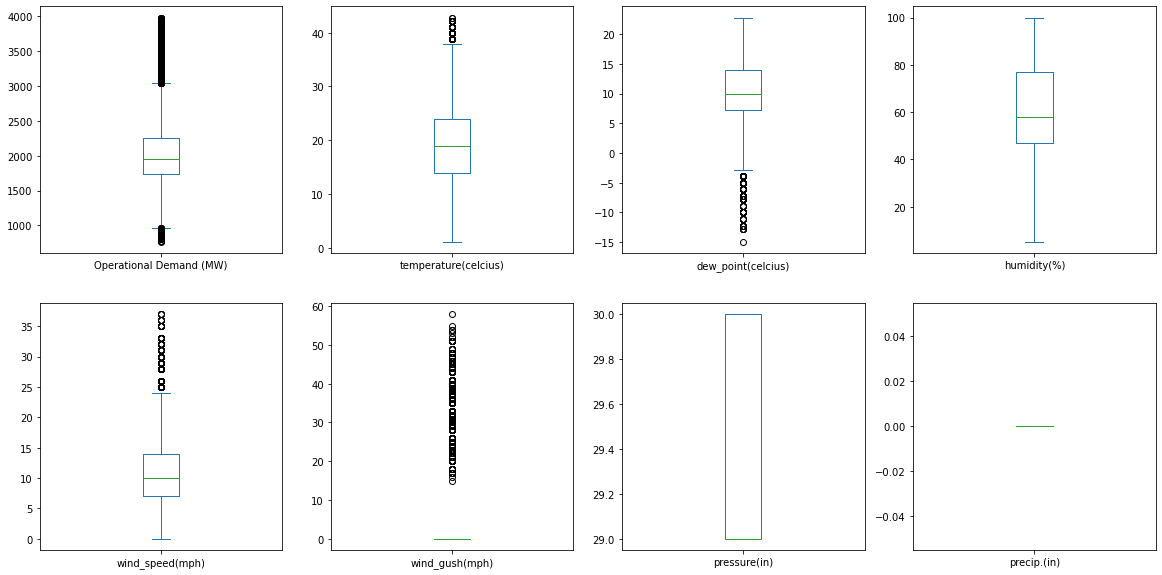

In [400]:
fig, axes = plt.subplots(nrows=2, ncols=4,figsize=(20, 10))
aemo_wu_df['Operational Demand (MW)'].plot.box(ax=axes[0,0])
aemo_wu_df['temperature(celcius)'].plot.box(ax=axes[0,1])
aemo_wu_df['dew_point(celcius)'].plot.box(ax=axes[0,2])
aemo_wu_df['humidity(%)'].plot.box(ax=axes[0,3])
aemo_wu_df['wind_speed(mph)'].plot.box(ax=axes[1,0])
aemo_wu_df['wind_gush(mph)'].plot.box(ax=axes[1,1])
aemo_wu_df['pressure(in)'].plot.box(ax=axes[1,2])
aemo_wu_df['precip.(in)'].plot.box(ax=axes[1,3])

Wind gush is almost 0 and percipation is completely 0. So removing the columns.

In [401]:
aemo_wu_df = aemo_wu_df.drop(['wind_gush(mph)','precip.(in)'], axis = 1)
numerical.remove('wind_gush(mph)')
numerical.remove('precip.(in)')

In [402]:
aemo_wu_df.describe()

,Operational Demand (MW),temperature(celcius),dew_point(celcius),humidity(%),wind_speed(mph),pressure(in),CALM,E,ENE,ESE,...,NW,S,SE,SSE,SSW,SW,VAR,W,WNW,WSW
count,97504.000000,97504.000000,97504.000000,97504.000000,97504.000000,97504.000000,97504.000000,97504.000000,97504.000000,97504.000000,...,97504.000000,97504.000000,97504.000000,97504.000000,97504.000000,97504.000000,97504.000000,97504.000000,97504.000000,97504.000000
mean,2024.033428,19.192862,10.358651,61.199264,11.037301,29.332540,0.019948,0.105032,0.072828,0.048767,...,0.018092,0.082417,0.029260,0.021250,0.189910,0.072110,0.000072,0.064438,0.027240,0.063341
std,403.227198,6.504368,4.280321,21.330864,5.149548,0.471126,0.139822,0.306596,0.259855,0.215382,...,0.133283,0.275001,0.168536,0.144219,0.392232,0.258671,0.008473,0.245533,0.162783,0.243577
min,761.204000,1.100000,-15.000000,5.000000,0.000000,29.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1739.725500,13.900000,7.200000,47.000000,7.000000,29.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1949.919000,18.900000,10.000000,58.000000,10.000000,29.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2260.464000,23.900000,13.900000,77.000000,14.000000,30.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3979.836000,42.800000,22.800000,100.000000,37.000000,30.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:xlabel='pressure(in)', ylabel='Operational Demand (MW)'>

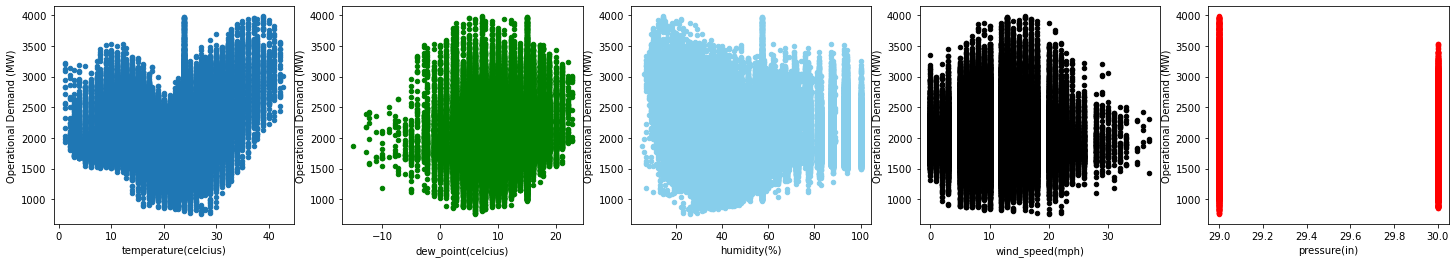

In [403]:
#pd.plotting.scatter_matrix(aemo_wu_df[['Operational Demand (MW)', 'temperature(celcius)']], figsize=(20, 10))

fig, axes = plt.subplots(nrows=1, ncols=5,figsize=(25, 4))
aemo_wu_df.plot.scatter(y = 'Operational Demand (MW)', x = 'temperature(celcius)', ax=axes[0,])
aemo_wu_df.plot.scatter(y = 'Operational Demand (MW)', x = 'dew_point(celcius)', ax=axes[1,], color = "green")
aemo_wu_df.plot.scatter(y = 'Operational Demand (MW)', x = 'humidity(%)', ax=axes[2,], color = "skyblue")
aemo_wu_df.plot.scatter(y = 'Operational Demand (MW)', x = 'wind_speed(mph)', ax=axes[3,], color = "black")
aemo_wu_df.plot.scatter(y = 'Operational Demand (MW)', x = 'pressure(in)', ax=axes[4,], color = "red")


In [404]:
aemo_wu_df.corr()

,Operational Demand (MW),temperature(celcius),dew_point(celcius),humidity(%),wind_speed(mph),pressure(in),CALM,E,ENE,ESE,...,NW,S,SE,SSE,SSW,SW,VAR,W,WNW,WSW
Operational Demand (MW),1.000000,0.196843,0.121277,-0.067923,0.044680,-0.095511,-0.038568,-0.081322,-0.035082,-0.007972,...,-0.003671,-0.046014,0.005043,-0.009574,0.085921,0.081106,0.002611,0.018518,0.009572,0.050958
temperature(celcius),0.196843,1.000000,0.307910,-0.771656,0.397263,-0.468408,-0.186248,0.048653,-0.077421,0.077715,...,-0.025634,-0.069244,0.042830,0.019374,0.172222,0.096616,0.012627,0.068072,-0.012089,0.107340
dew_point(celcius),0.121277,0.307910,1.000000,0.304610,0.035015,-0.446545,-0.057026,-0.136983,-0.184042,-0.080168,...,0.023663,-0.017725,-0.064543,-0.038969,0.319418,0.056407,-0.004811,0.078467,0.052499,0.069046
humidity(%),-0.067923,-0.771656,0.304610,1.000000,-0.439327,0.163130,0.181811,-0.149369,-0.049756,-0.128728,...,0.045279,0.055214,-0.083322,-0.042477,-0.013153,-0.070447,-0.010464,-0.026248,0.045014,-0.070264
wind_speed(mph),0.044680,0.397263,0.035015,-0.439327,1.000000,-0.293212,-0.305788,0.176906,-0.007173,0.050291,...,-0.000879,-0.052541,-0.015568,-0.046240,0.088659,0.133023,-0.013225,0.042623,-0.004357,0.101486
pressure(in),-0.095511,-0.468408,-0.446545,0.163130,-0.293212,1.000000,0.109329,0.073876,0.149340,0.013420,...,-0.020515,0.050640,0.023930,0.013733,-0.188518,-0.062032,-0.005981,-0.103765,-0.059274,-0.085421
CALM,-0.038568,-0.186248,-0.057026,0.181811,-0.305788,0.109329,1.000000,-0.048874,-0.039985,-0.032303,...,-0.019365,-0.042757,-0.024769,-0.021022,-0.069077,-0.039772,-0.001209,-0.037442,-0.023874,-0.037100
E,-0.081322,0.048653,-0.136983,-0.149369,0.176906,0.073876,-0.048874,1.000000,-0.096012,-0.077567,...,-0.046501,-0.102670,-0.059476,-0.050478,-0.165868,-0.095500,-0.002903,-0.089907,-0.057327,-0.089086
ENE,-0.035082,-0.077421,-0.184042,-0.049756,-0.007173,0.149340,-0.039985,-0.096012,1.000000,-0.063458,...,-0.038043,-0.083995,-0.048658,-0.041297,-0.135699,-0.078130,-0.002375,-0.073554,-0.046900,-0.072882
ESE,-0.007972,0.077715,-0.080168,-0.128728,0.050291,0.013420,-0.032303,-0.077567,-0.063458,1.000000,...,-0.030734,-0.067859,-0.039311,-0.033363,-0.109630,-0.063120,-0.001919,-0.059423,-0.037890,-0.058881


In [405]:
print("The correlation between Operational demand versus other 5 variables\n")

print("Operational Demand vs temperature\t: ", aemo_wu_df['Operational Demand (MW)'].corr(aemo_wu_df['temperature(celcius)']))
print("Operational Demand vs dew_point\t\t: ", aemo_wu_df['Operational Demand (MW)'].corr(aemo_wu_df['dew_point(celcius)']))
print("Operational Demand vs humidity\t\t: ",  aemo_wu_df['Operational Demand (MW)'].corr(aemo_wu_df['humidity(%)']))
print("Operational Demand vs wind_speed\t: ", aemo_wu_df['Operational Demand (MW)'].corr(aemo_wu_df['wind_speed(mph)']))
print("Operational Demand vs pressure\t\t: ", aemo_wu_df['Operational Demand (MW)'].corr(aemo_wu_df['pressure(in)']))

The correlation between Operational demand versus other 5 variables

Operational Demand vs temperature	:  0.1968427219578067
Operational Demand vs dew_point		:  0.12127721951352602
Operational Demand vs humidity		:  -0.06792254140950536
Operational Demand vs wind_speed	:  0.04467995981361229
Operational Demand vs pressure		:  -0.09551106630966173


In [406]:
aemo_wu_df.plot(x = "timestamp", y = 'Operational Demand (MW)', figsize=(30, 6), legend = False)
plt.title("Operational Demand over time")
plt.ylabel("Operational Demand")
plt.show()

KeyError: 'timestamp'

In [407]:
aemo_wu_df.plot(x = "timestamp", y = 'temperature(celcius)', figsize=(30, 6), legend = False)

KeyError: 'timestamp'

<AxesSubplot:xlabel='timestamp'>

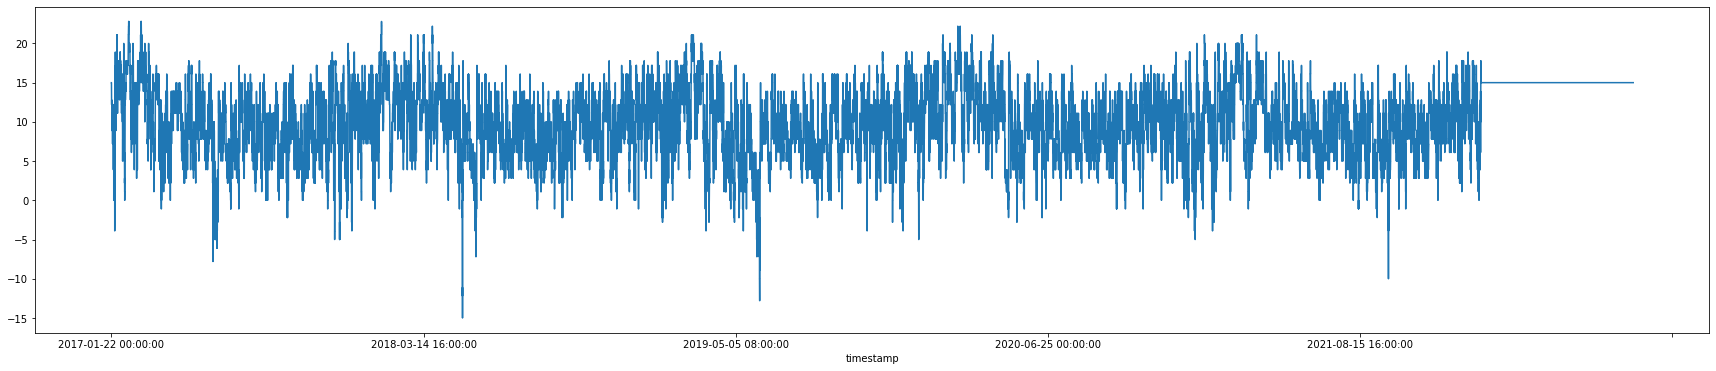

In [ ]:
aemo_wu_df.plot(x = "timestamp", y = 'dew_point(celcius)', figsize=(30, 6), legend = False)

In [ ]:
aemo_wu_df['year'] = pd.DatetimeIndex(aemo_wu_df['timestamp']).year

In [408]:
aemo_wu_df.head()

,Operational Demand (MW),temperature(celcius),dew_point(celcius),humidity(%),wind_speed(mph),pressure(in),Condition,CALM,E,ENE,...,NW,S,SE,SSE,SSW,SW,VAR,W,WNW,WSW
timestamp,,,,,,,,,,,,,,,,,,,,,
2017-01-22 00:00:00,1815.214,20.0,15.0,73.0,9.0,29.0,Fair,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2017-01-22 00:30:00,1777.040,20.0,15.0,73.0,10.0,29.0,Fair,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2017-01-22 01:00:00,1745.448,18.9,15.0,78.0,9.0,29.0,Fair,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2017-01-22 01:30:00,1729.164,18.9,15.0,78.0,15.0,29.0,Fair,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2017-01-22 02:00:00,1714.276,18.9,12.8,68.0,18.0,29.0,Fair,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [409]:
def create_features(df, label=None):
    """
    Creates time series features datetime column 
    """
    df['date'] = df.index
    df['hour'] = pd.DatetimeIndex(df['date']).hour
    df['dayofweek'] = pd.DatetimeIndex(df['date']).dayofweek
    df['quarter'] = pd.DatetimeIndex(df['date']).quarter
    df['month'] = pd.DatetimeIndex(df['date']).month
    df['year'] = pd.DatetimeIndex(df['date']).year
    df['dayofyear'] = pd.DatetimeIndex(df['date']).dayofyear
    df['dayofmonth'] = pd.DatetimeIndex(df['date']).day
    df['weekofyear'] = pd.DatetimeIndex(df['date']).weekofyear
    df = df.drop('date' , axis = 1)

    
    X = df[['hour','dayofweek','quarter','month','year',
           'dayofyear','dayofmonth','weekofyear']]
    if label:
        y = df[label]
        return X, y
    return X

In [410]:
aemo_wu_df.head()

,Operational Demand (MW),temperature(celcius),dew_point(celcius),humidity(%),wind_speed(mph),pressure(in),Condition,CALM,E,ENE,...,NW,S,SE,SSE,SSW,SW,VAR,W,WNW,WSW
timestamp,,,,,,,,,,,,,,,,,,,,,
2017-01-22 00:00:00,1815.214,20.0,15.0,73.0,9.0,29.0,Fair,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2017-01-22 00:30:00,1777.040,20.0,15.0,73.0,10.0,29.0,Fair,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2017-01-22 01:00:00,1745.448,18.9,15.0,78.0,9.0,29.0,Fair,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2017-01-22 01:30:00,1729.164,18.9,15.0,78.0,15.0,29.0,Fair,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2017-01-22 02:00:00,1714.276,18.9,12.8,68.0,18.0,29.0,Fair,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [417]:
dropped_columns = ['Operational Demand (MW)','date', 'Condition']

In [418]:
training_data = aemo_wu_df.loc[pd.DatetimeIndex(aemo_wu_df.index).year != 2020].copy()
testing_data = aemo_wu_df.loc[pd.DatetimeIndex(aemo_wu_df.index).year == 2020].copy()

X_train, y_train = create_features(training_data, label='Operational Demand (MW)')
X_test, y_test = create_features(testing_data, label='Operational Demand (MW)')

X_train = training_data.drop(dropped_columns , axis = 1)
y_train = training_data['Operational Demand (MW)']

X_test = testing_data.drop(dropped_columns, axis = 1)
y_test = testing_data['Operational Demand (MW)']


/var/folders/8y/sx1zv40d5936ksjl45wfjsrc0000gn/T/ipykernel_65271/2368057075.py:13: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  df['weekofyear'] = pd.DatetimeIndex(df['date']).weekofyear
/var/folders/8y/sx1zv40d5936ksjl45wfjsrc0000gn/T/ipykernel_65271/2368057075.py:13: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  df['weekofyear'] = pd.DatetimeIndex(df['date']).weekofyear


In [419]:
X_train.head()

,temperature(celcius),dew_point(celcius),humidity(%),wind_speed(mph),pressure(in),CALM,E,ENE,ESE,N,...,WNW,WSW,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
timestamp,,,,,,,,,,,,,,,,,,,,,
2017-01-22 00:00:00,20.0,15.0,73.0,9.0,29.0,0,0,0,0,0,...,0,0,0,6,1,1,2017,22,22,3
2017-01-22 00:30:00,20.0,15.0,73.0,10.0,29.0,0,0,0,0,0,...,0,0,0,6,1,1,2017,22,22,3
2017-01-22 01:00:00,18.9,15.0,78.0,9.0,29.0,0,0,0,0,0,...,0,0,1,6,1,1,2017,22,22,3
2017-01-22 01:30:00,18.9,15.0,78.0,15.0,29.0,0,0,0,0,0,...,0,0,1,6,1,1,2017,22,22,3
2017-01-22 02:00:00,18.9,12.8,68.0,18.0,29.0,0,0,0,0,0,...,0,0,2,6,1,1,2017,22,22,3


In [420]:
reg = XGBRegressor(n_estimators=1000)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        early_stopping_rounds=50,
       verbose=True) 

[0]	validation_0-rmse:1462.25110	validation_1-rmse:1402.66223


/Users/naufaln/opt/miniconda3/envs/cits5508-2022/lib/python3.8/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[1]	validation_0-rmse:1036.03418	validation_1-rmse:979.81628
[2]	validation_0-rmse:740.08252	validation_1-rmse:687.29742
[3]	validation_0-rmse:536.35468	validation_1-rmse:480.97934
[4]	validation_0-rmse:397.93289	validation_1-rmse:344.45987
[5]	validation_0-rmse:305.20377	validation_1-rmse:257.37866
[6]	validation_0-rmse:245.63322	validation_1-rmse:201.86946
[7]	validation_0-rmse:207.64625	validation_1-rmse:175.03473
[8]	validation_0-rmse:183.92250	validation_1-rmse:159.86450
[9]	validation_0-rmse:169.40250	validation_1-rmse:155.10066
[10]	validation_0-rmse:160.67888	validation_1-rmse:153.30955
[11]	validation_0-rmse:154.42767	validation_1-rmse:153.33220
[12]	validation_0-rmse:150.76000	validation_1-rmse:153.52933
[13]	validation_0-rmse:147.67554	validation_1-rmse:154.36594
[14]	validation_0-rmse:143.17860	validation_1-rmse:154.18564
[15]	validation_0-rmse:141.32262	validation_1-rmse:154.83714
[16]	validation_0-rmse:139.22102	validation_1-rmse:155.23750
[17]	validation_0-rmse:134.88165

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=1000, n_jobs=10,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

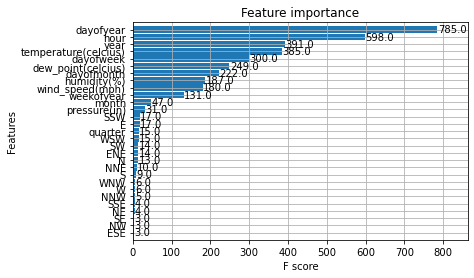

In [421]:
_ = plot_importance(reg, height=0.9) 

In [422]:
testing_data['MW_Prediction'] = reg.predict(X_test)
pjme_all = pd.concat([testing_data, training_data], sort=False)

#testing_data.index = pd.DatetimeIndex(testing_data['timestamp'])
# 
#testing_data.head(3)

In [423]:
columns = ['Operational Demand (MW)','MW_Prediction']

In [424]:
df = testing_data.loc[testing_data['month'] <= 4].copy()

df = df[columns]

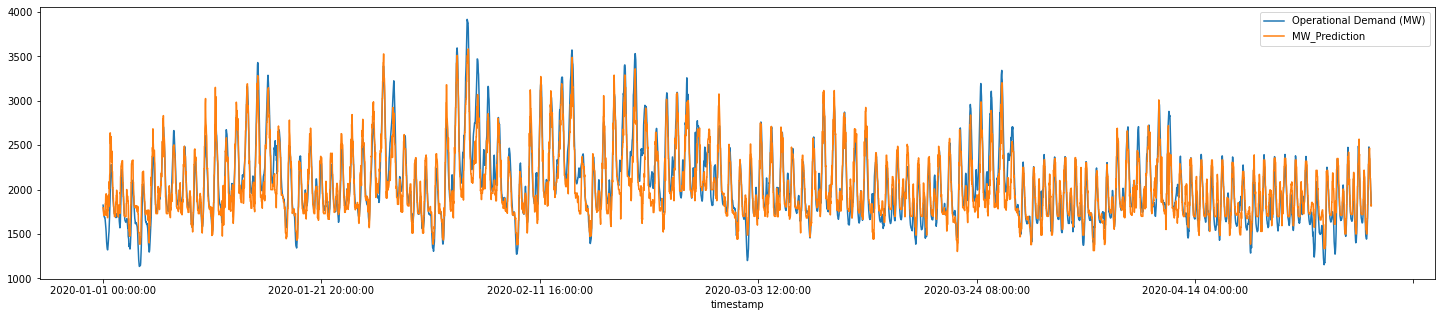

In [426]:
_ = df.plot(figsize=(25, 5))

In [ ]:
df = testing_data.loc[testing_data.index == "2021-01-20"].copy()
df = df[columns]

: 

In [ ]:
mse = mean_squared_error(y_test, testing_data['MW_Prediction'])
rmse_svm = np.sqrt(mse)
rmse_svm

306.7694840180518

In [ ]:
testing_data[columns].head(50)

,Operational Demand (MW),MW_Prediction
timestamp,,
2022-01-01 00:00:00,2139.158,2167.496826
2022-01-01 00:30:00,2112.486,2107.769043
2022-01-01 01:00:00,2051.064,2061.822998
2022-01-01 01:30:00,2001.144,2039.972534
2022-01-01 02:00:00,1956.240,1928.212402
2022-01-01 02:30:00,1925.352,1917.496338
2022-01-01 03:00:00,1910.048,1894.679932
2022-01-01 03:30:00,1878.614,1889.091675
2022-01-01 04:00:00,1877.364,1784.789307


In [ ]:
test_year = random.randint(2017,2022)

training_data = df.loc[pd.DatetimeIndex(df.index).year != 2022].copy()
testing_data = df.loc[pd.DatetimeIndex(df.index).year == 2022].copy()

X_train, y_train = create_features(training_data, label='Operational Demand (MW)')
X_test, y_test = create_features(testing_data, label='Operational Demand (MW)')


/var/folders/8y/sx1zv40d5936ksjl45wfjsrc0000gn/T/ipykernel_65271/528489730.py:13: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  df['weekofyear'] = pd.DatetimeIndex(df['date']).weekofyear
/var/folders/8y/sx1zv40d5936ksjl45wfjsrc0000gn/T/ipykernel_65271/528489730.py:13: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  df['weekofyear'] = pd.DatetimeIndex(df['date']).weekofyear
